In [1]:
from impact_score.json_analyser.pool.analyser_pool import analyser_pool
from impact_consumer import export_impact, export_probability_points, generate_probability_dataframe
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib import ticker
import time
from impact_score.impact_consumer.probability_consumer import export_probabilities
from impact_score.json_analyser.wrap.analyser_exporter import AnalyserExporter
from impact_score.json_analyser.wrap.analyser_loader import get_analyser
from impact_score.json_analyser.wrap.analyser_wrapper import AnalyserWrapper

In [2]:
match_id = 76730

In [3]:
a = get_analyser(match_id)
ae = AnalyserExporter(a)
w = AnalyserWrapper(a)
prob_df = pd.DataFrame(export_probabilities(match_id))
half_df = export_impact(core_analyser=a, exporter=ae, prob_df=prob_df)

Round 1 selected
Round 2 selected
Round 3 selected
Round 4 selected
Round 5 selected
Round 6 selected
Round 7 selected
Round 8 selected
Round 9 selected
Round 10 selected
Round 11 selected
Round 12 selected
Round 13 selected
Round 14 selected
Round 15 selected
Round 16 selected
Round 17 selected


In [4]:
prob_df

,Round,EventID,EventType,Probability_before_event,Probability_after_event,Impact
0,1,0,start,0.487584,0.487584,0.000000
1,1,9727807,kill,0.483847,0.317038,0.166809
2,1,9727805,kill,0.317038,0.515017,0.197980
3,1,9727806,kill,0.515017,0.739235,0.224218
4,1,9727801,kill,0.738299,0.917555,0.179256
...,...,...,...,...,...,...
148,17,9727913,kill,0.577102,0.256031,0.321071
149,17,9727917,kill,0.282698,0.023683,0.259015
150,17,9727916,kill,0.047800,0.103944,0.056144
151,17,9727915,kill,0.357674,0.025434,0.332240


In [5]:
half_df

,round_number,timing,author,victim,event,damage_type,weapon_id,ability,kill_id,round_id,...,Round,EventID,EventType,Probability_before_event,Probability_after_event,Impact,author_agent,victim_agent,weapon_name,means
0,1,0,0,0,start,0,0,0,0,1195741,...,1,0,start,0.487584,0.487584,0.000000,0,0,0,0
1,1,7350,Bazzi,Haodong,kill,weapon,12,0,9727807,1195741,...,1,9727807,kill,0.483847,0.317038,0.166809,Neon,Neon,Ghost,Ghost
2,1,8188,Life,Bazzi,kill,weapon,12,0,9727805,1195741,...,1,9727805,kill,0.317038,0.515017,0.197980,Raze,Neon,Ghost,Ghost
3,1,8417,Life,Estrella,kill,weapon,12,0,9727806,1195741,...,1,9727806,kill,0.515017,0.739235,0.224218,Raze,Breach,Ghost,Ghost
4,1,25462,ZmjjKK,eKo,kill,weapon,10,0,9727801,1195741,...,1,9727801,kill,0.738299,0.917555,0.179256,Chamber,KAY/O,Frenzy,Frenzy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,17,42578,Haodong,eKo,kill,weapon,6,0,9727913,1195757,...,17,9727913,kill,0.577102,0.256031,0.321071,Neon,KAY/O,Phantom,Phantom
149,17,43519,nobody,GodDead,kill,weapon,4,0,9727917,1195757,...,17,9727917,kill,0.282698,0.023683,0.259015,Breach,Chamber,Vandal,Vandal
150,17,49381,TS,nobody,kill,ability,0,Orbital Strike,9727916,1195757,...,17,9727916,kill,0.047800,0.103944,0.056144,Brimstone,Breach,0,Orbital Strike
151,17,53263,Life,TS,kill,weapon,4,0,9727915,1195757,...,17,9727915,kill,0.357674,0.025434,0.332240,Raze,Brimstone,Vandal,Vandal


In [7]:
match_data = w.export_df()
new_df = pd.merge(half_df, match_data,  how='left', left_on=['round_number','timing'], right_on = ['RoundNumber','RoundTime'])
new_df

,round_number,timing,author,victim,event,damage_type,weapon_id,ability,kill_id,round_id,...,DEF_compaction,Team_A_ID,Team_A_Name,Team_B_ID,Team_B_Name,Sentinel_loadout_diff,Initiator_loadout_diff,Controller_loadout_diff,Duelist_loadout_diff,Loadout_diff
0,1,0,0,0,start,0,0,0,0,1195741,...,240.141515,808,EDward Gaming,5373,On Sla2ers,-50,-800,50,800,0
1,1,7350,Bazzi,Haodong,kill,weapon,12,0,9727807,1195741,...,240.141515,808,EDward Gaming,5373,On Sla2ers,-50,-800,50,0,-800
2,1,8188,Life,Bazzi,kill,weapon,12,0,9727805,1195741,...,257.719752,808,EDward Gaming,5373,On Sla2ers,-50,-800,50,700,-100
3,1,8417,Life,Estrella,kill,weapon,12,0,9727806,1195741,...,256.983010,808,EDward Gaming,5373,On Sla2ers,-50,-50,50,700,650
4,1,25462,ZmjjKK,eKo,kill,weapon,10,0,9727801,1195741,...,93.529083,808,EDward Gaming,5373,On Sla2ers,-50,700,50,700,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,17,42578,Haodong,eKo,kill,weapon,6,0,9727913,1195757,...,150.910466,808,EDward Gaming,5373,On Sla2ers,1950,-4600,-1950,-9200,-13800
149,17,43519,nobody,GodDead,kill,weapon,4,0,9727917,1195757,...,153.531887,808,EDward Gaming,5373,On Sla2ers,0,-4600,-1950,-9200,-15750
150,17,49381,TS,nobody,kill,ability,0,Orbital Strike,9727916,1195757,...,133.323646,808,EDward Gaming,5373,On Sla2ers,0,0,-1950,-9200,-11150
151,17,53263,Life,TS,kill,weapon,4,0,9727915,1195757,...,174.922609,808,EDward Gaming,5373,On Sla2ers,0,0,-4650,-9200,-13850


In [30]:
data = export_probability_points(match_id)["Round_3"]
y_values = data["probability_points"]
x_values = data["timestamp_points"]

In [31]:
df = generate_probability_dataframe(data)
df

,timestamp,probability,label,kill_feed
0,0,0.531489,A,Round Start
1,0,0.531489,None,None
2,8299,0.572944,B,Delz1k Spectre Nivera
3,8299,0.331810,None,None
4,42780,0.349171,C,Jamppi Vandal keznit
5,42780,0.572579,None,None
6,44737,0.572579,D,Jamppi Vandal Klaus
7,44737,0.755173,None,None
8,56215,0.747558,E,Jamppi Vandal Delz1k
9,56215,0.902971,None,None


NameError: name 'x_values' is not defined

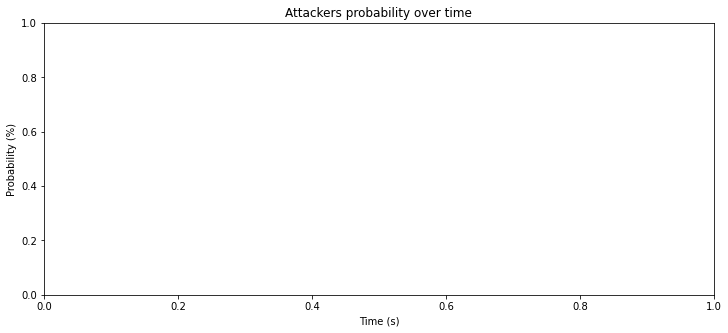

In [6]:
plt.figure(figsize=(12, 5))
plt.title('Attackers probability over time')
plt.xlabel('Time (s)')
plt.ylabel('Probability (%)')
markers_on = list(range(1, len(x_values), 2))
ax = plt.gca()
n = list(df["label"])

for i, txt in enumerate(n):
    if txt is None:
        plt.text(x_values[i], y_values[i]+0.007, n[i-1], horizontalalignment='center', verticalalignment='bottom',
                 fontsize=12)

legend_elements = []

for event in df["kill_feed"]:
    if event is not None:
        label_index = chr(65 + len(legend_elements))
        new_label = f"{label_index} → {event}"
        new_element = Line2D([0], [0], marker='o', color='w', label=new_label, markerfacecolor='r', markersize=10)
        legend_elements.append(new_element)
plt.legend(handles=legend_elements, loc=(1.04,0.45))
plt.grid(linewidth=0.4)

plt.plot(df["timestamp"], df["probability"], color="red", linewidth=1.0,
         marker='o', markersize=6, markerfacecolor="black", markevery=markers_on)

current_values = plt.gca().get_yticks()
plt.axhline(y=0, color='white', linestyle='-')

bomb_query = df[df['kill_feed'].str.contains("bomb")==True]
if len(bomb_query) == 1:
    bomb_stamp = bomb_query["timestamp"].to_list()[0]
    plt.axvline(x=bomb_stamp, color='pink', linestyle='-', linewidth=2.0)

formatter = ticker.FuncFormatter(lambda ms, x: time.strftime('%M:%S', time.gmtime(ms // 1000)))
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.show()

In [27]:
# Create odd numbers until 16
odd_numbers = list(range(1, len(x_values), 2))
odd_numbers

[1, 3, 5, 7, 9, 11, 13, 15]

In [16]:
#df_row = df.loc[df["kill_feed"].str.contains("bomb")]
df_row = df[df['kill_feed'].str.contains("bomb")==True]["timestamp"].to_list()[0]
df_row

63842

In [22]:
bomb_query = df[df['kill_feed'].str.contains("bomb")==True]
len(bomb_query)

1